# Telco Churn Draft Notebook

In [2]:
# Importing neccessary libraries and modules
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from acquire import get_telco_data, summarize_df
from prepare import num_distributions, prep_telco
import graphviz
from graphviz import Graph
import warnings
warnings.filterwarnings('ignore')
import explore

## Acquisition
- Acquire uncleaned `telco_churn` dataset
- Garner basic understanding of dataset using functions from `acquire.py` such as shape, info, describe, etc.
- Create basic distributions of numeric columns

In [3]:
# Pull df from acquire.py and look at the first few entries using df.head()
unclean_telco = get_telco_data()
unclean_telco.head(10).T

,0,1,2,3,4,5,6,7,8,9
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female
senior_citizen,0,0,0,1,1,0,1,0,1,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes
internet_service_type_id,1,1,2,2,2,1,2,2,1,1
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes


In [4]:
# High level summary of data including value_counts, dtypes, 
summarize_df(unclean_telco)

This dataframe has 7043 rows and 21 columns.
------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   objec

#### Pre-cleaning extrapolations
- Lots of variables need encoding and renaming
- Unneccesary columns such as `customer_id`
- See <a href="https://github.com/Marley-C-Robinson-99/Classification-Project#readme">README.md</a> for data dictionary that explains each variable
- Non-normal distributions for numeric categories.

# Preparation
- Clean data using the <a href="https://github.com/Marley-C-Robinson-99/Classification-Project/blob/main/prepare.py">prepare.py</a> functions `prep_telco()`
    - Renamed columns to increase understandability
    - Removed duplicates and entries with empty(null) total_charges
    - Created dummies for `internet_service_type_id`, `payment_type_id`, and `contract_type_id`
    - Created features `fbr_multi_line` and `auto_bill`
- Look at distributions of variables
- Split data into train, validate, and test sets

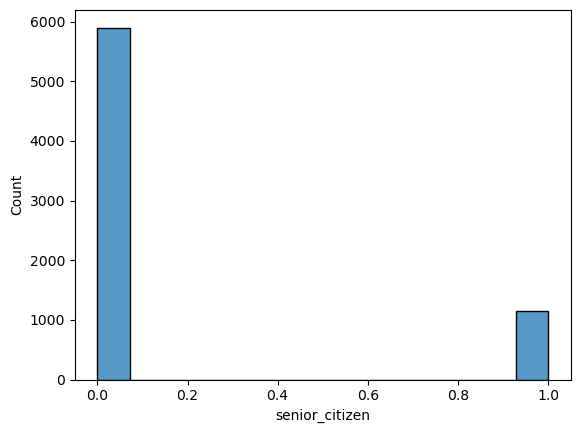

0    5901
1    1142
Name: senior_citizen, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


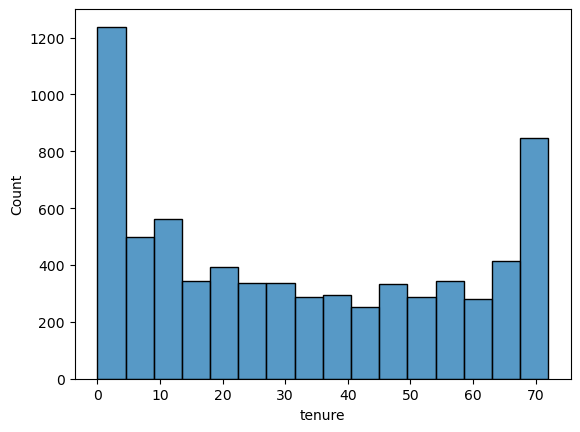

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


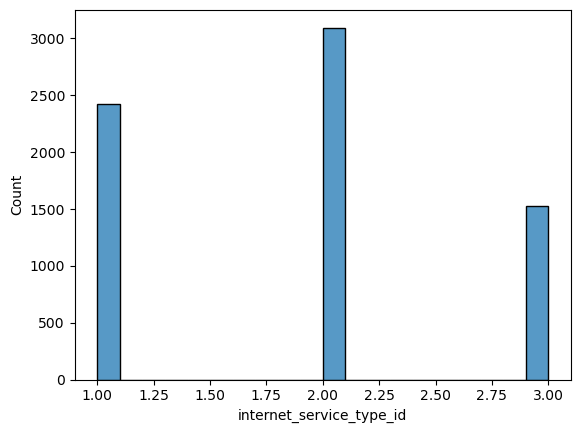

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


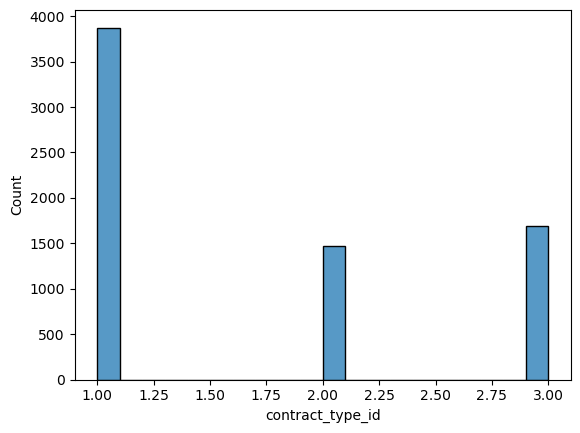

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


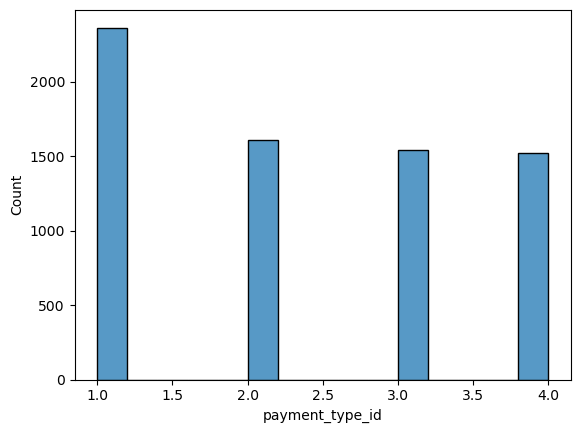

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


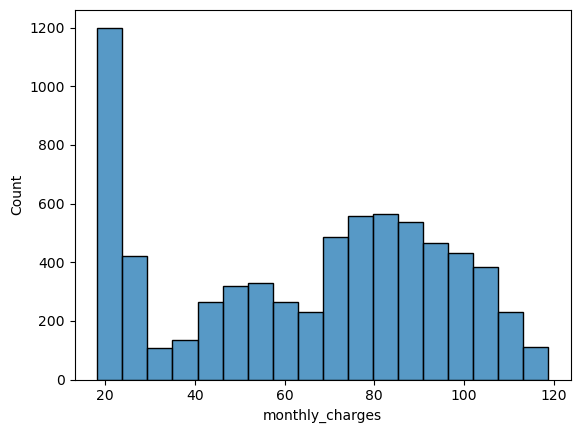

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


In [5]:
for col, vals in unclean_telco.iteritems():
    if unclean_telco[f'{col}'].dtype != object:
        print(unclean_telco[f'{col}'].value_counts(), sns.histplot(data = unclean_telco[f'{col}']), plt.show(),
              end = '\n------------------------------------\n')

In [6]:
train, validate, test = prep_telco(get_telco_data())
train.shape, validate.shape, test.shape

((3937, 32), (1688, 32), (1407, 32))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   is_male             3937 non-null   int64  
 1   is_senior           3937 non-null   int64  
 2   has_partner         3937 non-null   int64  
 3   has_dependents      3937 non-null   int64  
 4   tenure              3937 non-null   int64  
 5   has_phone           3937 non-null   int64  
 6   has_multi_line      3937 non-null   int64  
 7   has_onl_sec         3937 non-null   int64  
 8   has_backup          3937 non-null   int64  
 9   has_dev_pro         3937 non-null   int64  
 10  has_tech_supp       3937 non-null   int64  
 11  has_tv_strm         3937 non-null   int64  
 12  has_mv_strm         3937 non-null   int64  
 13  has_pprless_bill    3937 non-null   int64  
 14  monthly_charges     3937 non-null   float64
 15  total_charges       3937 non-null   float64
 16  has

In [8]:
train.head().T

,5919,1915,5054,2355,6279
is_male,0.0,1.00,0.00,1.0,1.0
is_senior,0.0,0.00,0.00,0.0,1.0
has_partner,0.0,0.00,1.00,1.0,0.0
has_dependents,0.0,1.00,1.00,1.0,0.0
tenure,58.0,71.00,35.00,1.0,20.0
has_phone,1.0,1.00,1.00,1.0,1.0
has_multi_line,1.0,1.00,1.00,0.0,0.0
has_onl_sec,1.0,1.00,0.00,0.0,1.0
has_backup,1.0,1.00,0.00,0.0,0.0
has_dev_pro,1.0,0.00,0.00,0.0,0.0


# Exploration
- Run statistical tests to evaluate any potential correllations
    - Form hypotheses based upon statistical data
- Utilize visualization to 

## Univariate Stat Tests

In [9]:
# Listing columns to separate quantitative vars from categorical vars
train.columns

Index(['is_male', 'is_senior', 'has_partner', 'has_dependents', 'tenure',
       'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm',
       'has_pprless_bill', 'monthly_charges', 'total_charges', 'has_churned',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill', 'fbr_multi_line',
       'full_protection', 'mtm_fiber', 'partner_dependents'],
      dtype='object')

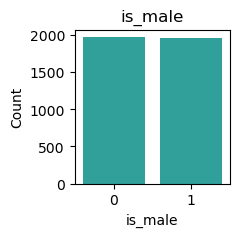

   is_male  Count  Percent
1        0   1976    50.19
0        1   1961    49.81
_________________________________________________________________


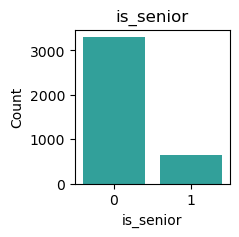

   is_senior  Count  Percent
0          0   3302    83.87
1          1    635    16.13
_________________________________________________________________


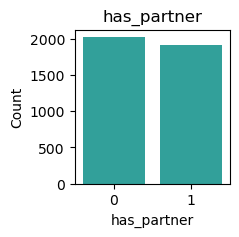

   has_partner  Count  Percent
0            0   2027    51.49
1            1   1910    48.51
_________________________________________________________________


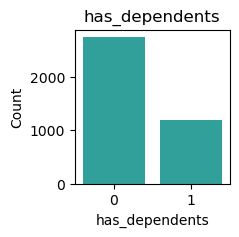

   has_dependents  Count  Percent
0               0   2745    69.72
1               1   1192    30.28
_________________________________________________________________


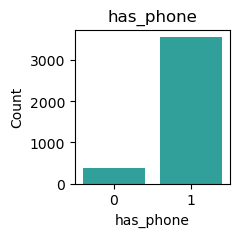

   has_phone  Count  Percent
1          1   3564    90.53
0          0    373     9.47
_________________________________________________________________


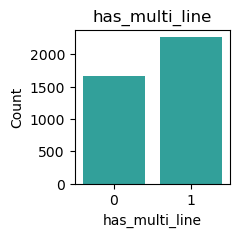

   has_multi_line  Count  Percent
0               1   2268    57.61
1               0   1669    42.39
_________________________________________________________________


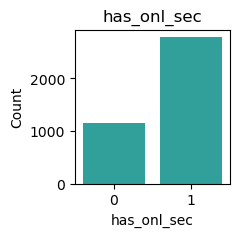

   has_onl_sec  Count  Percent
0            1   2785    70.74
1            0   1152    29.26
_________________________________________________________________


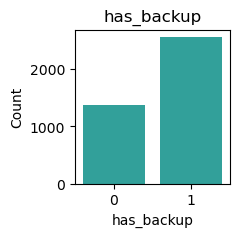

   has_backup  Count  Percent
0           1   2564    65.13
1           0   1373    34.87
_________________________________________________________________


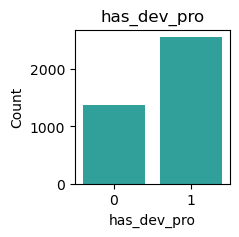

   has_dev_pro  Count  Percent
0            1   2560    65.02
1            0   1377    34.98
_________________________________________________________________


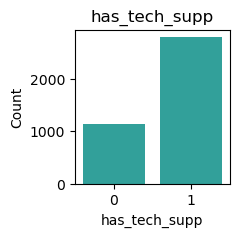

   has_tech_supp  Count  Percent
0              1   2798    71.07
1              0   1139    28.93
_________________________________________________________________


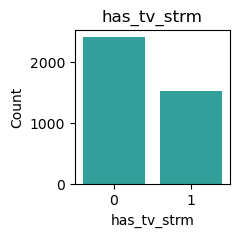

   has_tv_strm  Count  Percent
0            0   2416    61.37
1            1   1521    38.63
_________________________________________________________________


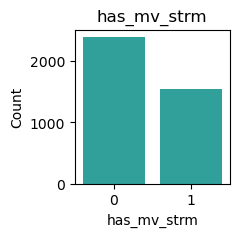

   has_mv_strm  Count  Percent
0            0   2396    60.86
1            1   1541    39.14
_________________________________________________________________


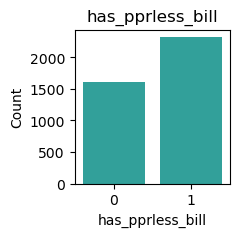

   has_pprless_bill  Count  Percent
1                 1   2324    59.03
0                 0   1613    40.97
_________________________________________________________________


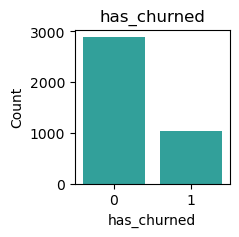

   has_churned  Count  Percent
0            0   2891    73.43
1            1   1046    26.57
_________________________________________________________________


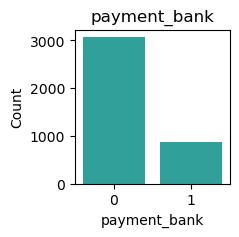

   payment_bank  Count  Percent
0             0   3075    78.11
1             1    862    21.89
_________________________________________________________________


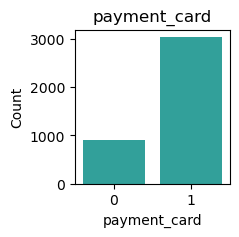

   payment_card  Count  Percent
0             1   3042    77.27
1             0    895    22.73
_________________________________________________________________


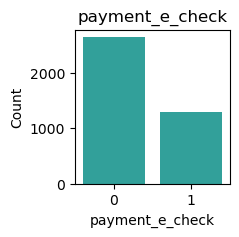

   payment_e_check  Count  Percent
0                0   2648    67.26
1                1   1289    32.74
_________________________________________________________________


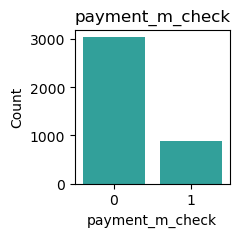

   payment_m_check  Count  Percent
0                0   3046    77.37
1                1    891    22.63
_________________________________________________________________


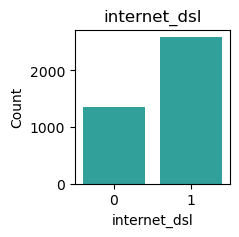

   internet_dsl  Count  Percent
0             1   2589    65.76
1             0   1348    34.24
_________________________________________________________________


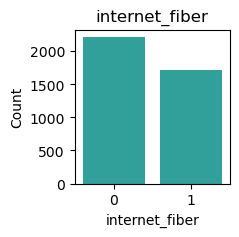

   internet_fiber  Count  Percent
0               0   2215    56.26
1               1   1722    43.74
_________________________________________________________________


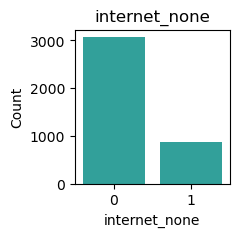

   internet_none  Count  Percent
0              0   3070    77.98
1              1    867    22.02
_________________________________________________________________


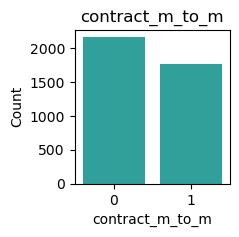

   contract_m_to_m  Count  Percent
1                0   2165    54.99
0                1   1772    45.01
_________________________________________________________________


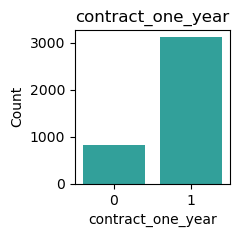

   contract_one_year  Count  Percent
0                  1   3122     79.3
1                  0    815     20.7
_________________________________________________________________


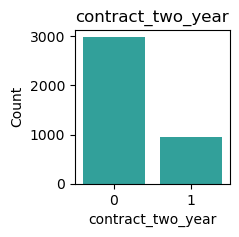

   contract_two_year  Count  Percent
0                  0   2980    75.69
1                  1    957    24.31
_________________________________________________________________


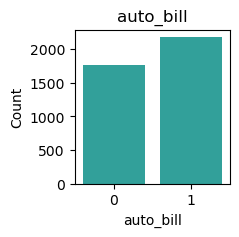

   auto_bill  Count  Percent
0          1   2180    55.37
1          0   1757    44.63
_________________________________________________________________


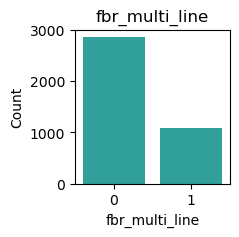

   fbr_multi_line  Count  Percent
0               0   2860    72.64
1               1   1077    27.36
_________________________________________________________________


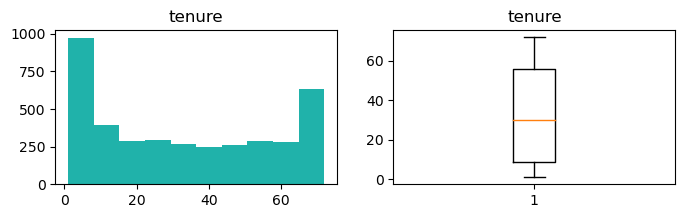

count    3937.000000
mean       32.775210
std        24.709604
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


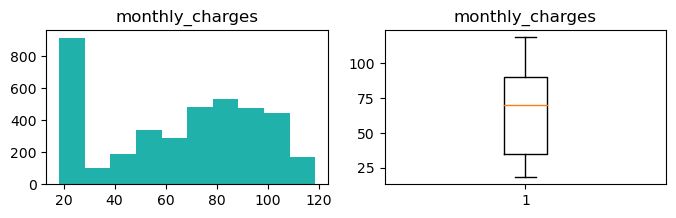

count    3937.000000
mean       64.805131
std        30.294804
min        18.250000
25%        34.700000
50%        70.250000
75%        90.300000
max       118.650000
Name: monthly_charges, dtype: float64


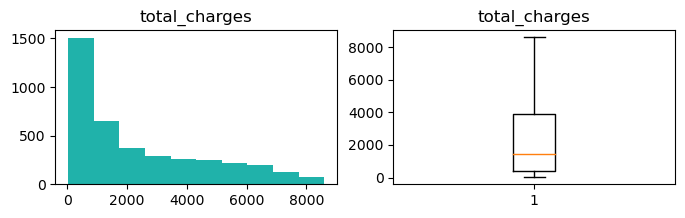

count    3937.000000
mean     2316.775641
std      2284.984394
min        18.850000
25%       396.100000
50%      1414.800000
75%      3893.600000
max      8594.400000
Name: total_charges, dtype: float64


In [10]:
# Seperating vars and running stat tests
cat_vars = ['is_male', 'is_senior', 'has_partner', 'has_dependents', 'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm','has_pprless_bill','has_churned',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill',
       'fbr_multi_line']

quant_vars = ['tenure','monthly_charges', 'total_charges']

explore.explore_univariate(train, cat_vars, quant_vars)

#### Univariate Stat Test Takeaways
- 26.6% Have churned
    - Baseline will be based upon customers not churning
- Mean monthly charge is 64.8
- Mean total charge is 2316.8
- Month-to-month customers have the highest share of contracts (45%)
- 43% of customers have a fiber internet plan

## Bivariate Stat Test

is_male 
_____________________

       chi2   p-value  degrees of freedom
0  0.003148  0.955259                   1

observed:
 contract_m_to_m     0     1   All
is_male                          
0                 884  1077  1961
1                 888  1088  1976
All              1772  2165  3937

expected:
             0            1
0  882.624333  1078.375667
1  889.375667  1086.624333


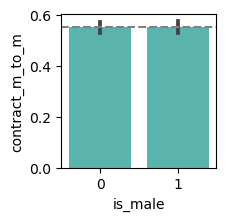


_____________________

is_senior 
_____________________

        chi2       p-value  degrees of freedom
0  67.469368  2.139861e-16                   1

observed:
 contract_m_to_m     0     1   All
is_senior                        
0                1581  1721  3302
1                 191   444   635
All              1772  2165  3937

expected:
              0            1
0  1486.193548  1815.806452
1   285.806452   349.193548


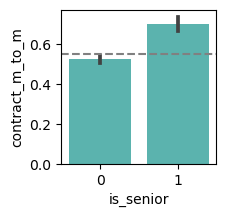


_____________________

has_partner 
_____________________

         chi2       p-value  degrees of freedom
0  279.513804  9.584003e-63                   1

observed:
 contract_m_to_m     0     1   All
has_partner                      
0                 651  1376  2027
1                1121   789  1910
All              1772  2165  3937

expected:
             0            1
0  912.330201  1114.669799
1  859.669799  1050.330201


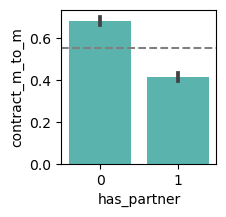


_____________________

has_dependents 
_____________________

         chi2       p-value  degrees of freedom
0  184.841148  4.250861e-42                   1

observed:
 contract_m_to_m     0     1   All
has_dependents                   
0                1040  1705  2745
1                 732   460  1192
All              1772  2165  3937

expected:
              0            1
0  1235.494031  1509.505969
1   536.505969   655.494031


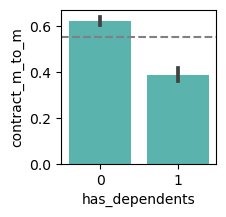


_____________________

has_phone 
_____________________

       chi2   p-value  degrees of freedom
0  0.001757  0.966568                   1

observed:
 contract_m_to_m     0     1   All
has_phone                        
0                 168   205   373
1                1604  1960  3564
All              1772  2165  3937

expected:
             0           1
0   167.88316   205.11684
1  1604.11684  1959.88316


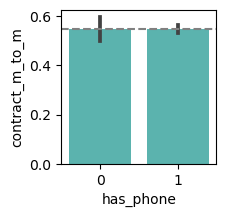


_____________________

has_multi_line 
_____________________

      chi2   p-value  degrees of freedom
0  23.8278  0.000001                   1

observed:
 contract_m_to_m     0     1   All
has_multi_line                   
0                 945  1323  2268
1                 827   842  1669
All              1772  2165  3937

expected:
              0            1
0  1020.801626  1247.198374
1   751.198374   917.801626


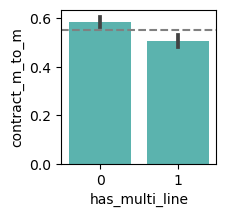


_____________________

has_onl_sec 
_____________________

         chi2       p-value  degrees of freedom
0  246.545611  1.470782e-55                   1

observed:
 contract_m_to_m     0     1   All
has_onl_sec                      
0                1030  1755  2785
1                 742   410  1152
All              1772  2165  3937

expected:
              0            1
0  1253.497587  1531.502413
1   518.502413   633.497587


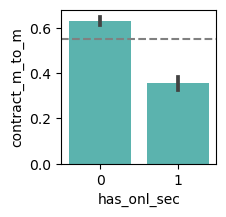


_____________________

has_backup 
_____________________

        chi2       p-value  degrees of freedom
0  94.382112  2.601324e-22                   1

observed:
 contract_m_to_m     0     1   All
has_backup                       
0                1009  1555  2564
1                 763   610  1373
All              1772  2165  3937

expected:
             0           1
0  1154.02794  1409.97206
1   617.97206   755.02794


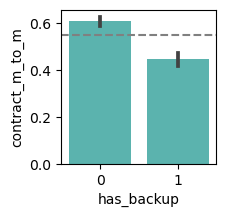


_____________________

has_dev_pro 
_____________________

         chi2       p-value  degrees of freedom
0  176.414892  2.939257e-40                   1

observed:
 contract_m_to_m     0     1   All
has_dev_pro                      
0                 954  1606  2560
1                 818   559  1377
All              1772  2165  3937

expected:
              0            1
0  1152.227584  1407.772416
1   619.772416   757.227584


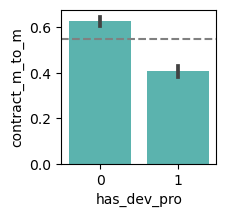


_____________________

has_tech_supp 
_____________________

         chi2       p-value  degrees of freedom
0  316.579483  8.053342e-71                   1

observed:
 contract_m_to_m     0     1   All
has_tech_supp                    
0                1007  1791  2798
1                 765   374  1139
All              1772  2165  3937

expected:
              0            1
0  1259.348743  1538.651257
1   512.651257   626.348743


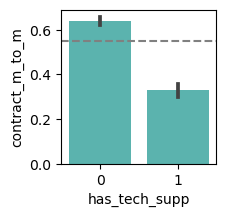


_____________________

has_tv_strm 
_____________________

        chi2       p-value  degrees of freedom
0  59.168061  1.447645e-14                   1

observed:
 contract_m_to_m     0     1   All
has_tv_strm                      
0                 970  1446  2416
1                 802   719  1521
All              1772  2165  3937

expected:
              0            1
0  1087.414783  1328.585217
1   684.585217   836.414783


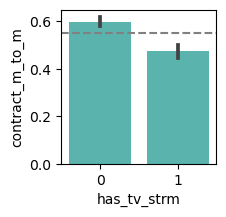


_____________________

has_mv_strm 
_____________________

        chi2       p-value  degrees of freedom
0  55.902572  7.615287e-14                   1

observed:
 contract_m_to_m     0     1   All
has_mv_strm                      
0                 964  1432  2396
1                 808   733  1541
All              1772  2165  3937

expected:
              0            1
0  1078.413005  1317.586995
1   693.586995   847.413005


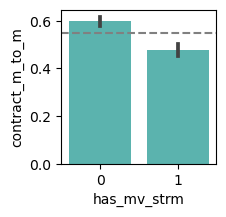


_____________________

has_pprless_bill 
_____________________

        chi2       p-value  degrees of freedom
0  98.691883  2.950088e-23                   1

observed:
 contract_m_to_m      0     1   All
has_pprless_bill                  
0                  879   734  1613
1                  893  1431  2324
All               1772  2165  3937

expected:
              0            1
0   725.993396   887.006604
1  1046.006604  1277.993396


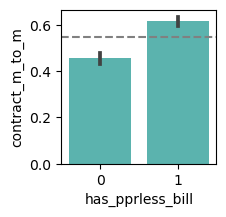


_____________________

payment_bank 
_____________________

         chi2       p-value  degrees of freedom
0  134.165354  5.026950e-31                   1

observed:
 contract_m_to_m     0     1   All
payment_bank                     
0                1234  1841  3075
1                 538   324   862
All              1772  2165  3937

expected:
              0            1
0  1384.023368  1690.976632
1   387.976632   474.023368


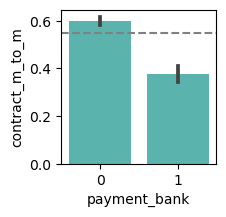


_____________________

payment_card 
_____________________

         chi2       p-value  degrees of freedom
0  160.354962  9.464419e-37                   1

observed:
 contract_m_to_m     0     1   All
payment_card                     
0                1203  1839  3042
1                 569   326   895
All              1772  2165  3937

expected:
              0            1
0  1369.170434  1672.829566
1   402.829566   492.170434


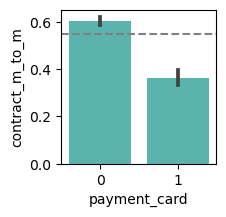


_____________________

payment_e_check 
_____________________

         chi2       p-value  degrees of freedom
0  415.691558  2.114662e-92                   1

observed:
 contract_m_to_m     0     1   All
payment_e_check                  
0                1491  1157  2648
1                 281  1008  1289
All              1772  2165  3937

expected:
              0            1
0  1191.835408  1456.164592
1   580.164592   708.835408


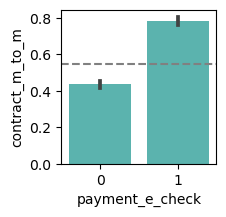


_____________________

payment_m_check 
_____________________

       chi2  p-value  degrees of freedom
0  1.601295  0.20572                   1

observed:
 contract_m_to_m     0     1   All
payment_m_check                  
0                1388  1658  3046
1                 384   507   891
All              1772  2165  3937

expected:
             0           1
0  1370.97079  1675.02921
1   401.02921   489.97079


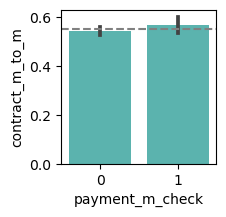


_____________________

internet_dsl 
_____________________

        chi2   p-value  degrees of freedom
0  16.837453  0.000041                   1

observed:
 contract_m_to_m     0     1   All
internet_dsl                     
0                1104  1485  2589
1                 668   680  1348
All              1772  2165  3937

expected:
              0            1
0  1165.280163  1423.719837
1   606.719837   741.280163


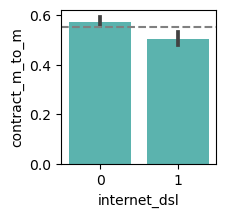


_____________________

internet_fiber 
_____________________

         chi2       p-value  degrees of freedom
0  199.196469  3.127391e-45                   1

observed:
 contract_m_to_m     0     1   All
internet_fiber                   
0                1216   999  2215
1                 556  1166  1722
All              1772  2165  3937

expected:
             0            1
0  996.946914  1218.053086
1  775.053086   946.946914


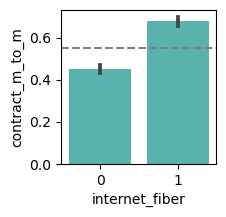


_____________________

internet_none 
_____________________

         chi2       p-value  degrees of freedom
0  147.817235  5.200953e-34                   1

observed:
 contract_m_to_m     0     1   All
internet_none                    
0                1224  1846  3070
1                 548   319   867
All              1772  2165  3937

expected:
              0            1
0  1381.772924  1688.227076
1   390.227076   476.772924


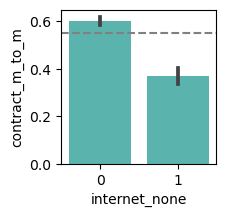


_____________________

contract_one_year 
_____________________

          chi2        p-value  degrees of freedom
0  1252.895195  1.949404e-274                   1

observed:
 contract_m_to_m       0     1   All
contract_one_year                  
0                   957  2165  3122
1                   815     0   815
All                1772  2165  3937

expected:
              0            1
0  1405.177546  1716.822454
1   366.822454   448.177546


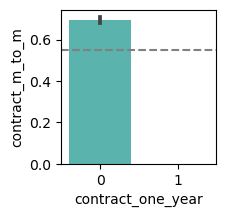


_____________________

contract_two_year 
_____________________

          chi2  p-value  degrees of freedom
0  1541.805676      0.0                   1

observed:
 contract_m_to_m       0     1   All
contract_two_year                  
0                   815  2165  2980
1                   957     0   957
All                1772  2165  3937

expected:
              0            1
0  1341.264923  1638.735077
1   430.735077   526.264923


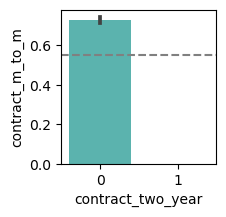


_____________________

auto_bill 
_____________________

         chi2       p-value  degrees of freedom
0  413.883853  5.232643e-92                   1

observed:
 contract_m_to_m     0     1   All
auto_bill                        
0                 665  1515  2180
1                1107   650  1757
All              1772  2165  3937

expected:
             0            1
0  981.193802  1198.806198
1  790.806198   966.193802


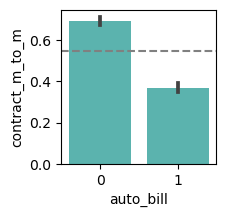


_____________________

fbr_multi_line 
_____________________

        chi2       p-value  degrees of freedom
0  37.526522  9.017838e-10                   1

observed:
 contract_m_to_m     0     1   All
fbr_multi_line                   
0                1373  1487  2860
1                 399   678  1077
All              1772  2165  3937

expected:
              0            1
0  1287.254255  1572.745745
1   484.745745   592.254255


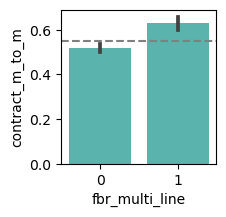


_____________________

tenure 
____________________



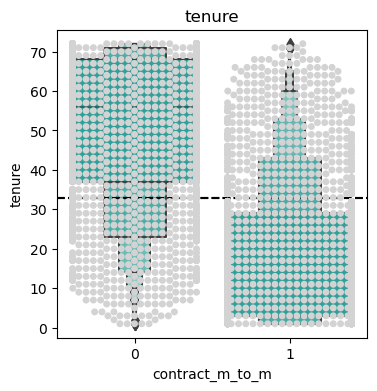

                  count       mean        std  min   25%   50%   75%   max
contract_m_to_m                                                           
0                1772.0  50.676637  19.526520  1.0  37.0  56.0  68.0  72.0
1                2165.0  18.123326  17.924829  1.0   3.0  11.0  29.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3371072.0, pvalue=0.0)

____________________

monthly_charges 
____________________



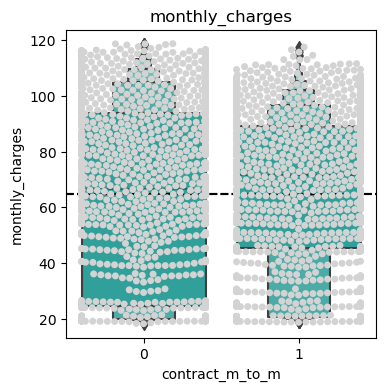

                  count       mean        std    min    25%    50%    75%  \
contract_m_to_m                                                             
0                1772.0  63.316874  33.369650  18.25  24.75  66.45  93.80   
1                2165.0  66.023233  27.471695  18.75  45.30  71.55  89.05   

                    max  
contract_m_to_m          
0                118.65  
1                117.45   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1860998.0, pvalue=0.10699442956658152)

____________________

total_charges 
____________________



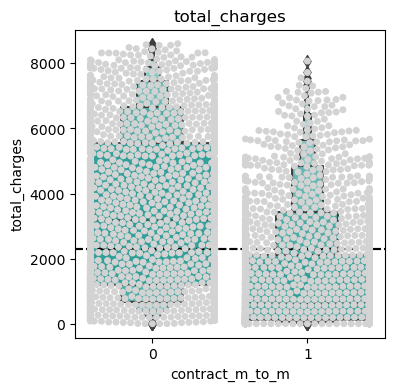

                  count         mean          std    min        25%       50%  \
contract_m_to_m                                                                 
0                1772.0  3455.143679  2430.440295  19.65  1211.3125  3209.925   
1                2165.0  1385.049007  1653.054436  18.85   147.8000   663.050   

                       75%     max  
contract_m_to_m                     
0                5550.3625  8594.4  
1                2130.4500  8061.5   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2976011.5, pvalue=2.658804634487466e-195)

____________________



In [60]:
# Removed has_churned from cat_vars
cat_vars = ['is_male', 'is_senior', 'has_partner', 'has_dependents', 'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm','has_pprless_bill',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none',
       'contract_one_year', 'contract_two_year', 'auto_bill',
       'fbr_multi_line']

quant_vars = ['tenure','monthly_charges', 'total_charges']

explore.explore_bivariate(train, 'contract_m_to_m', cat_vars, quant_vars)

#### Bivariate Stat Test Takeaways
- Demographic info:
    - gender has little effect on churn
    - `is_senior` is highly correllated with churn despite low number of observations
    - Single individuals and those without dependents have higher rates of churn
- Package info:
    - While having a phone is not correlated with churn, `has_multi_line` is moderately associated with churn
    - Having security 'add ons' such as online security, online backup, device protection, and tech support has an inverse effect on churn
    - Movie and TV streamers are moderately correlated with churn
    - Fiber internet is VERY highly correlated with churn
- Billing info:
    - Paperless billing correlated highly with churn
    - All payment types aside from e-check are inversely correlated with churn
- Month-to-month contracts are extremely correlated to churn
- Fiber internet with multiple lines also very correlated with churn
    - every mtm customer with fiber has at least one line
- Those who churn more likely to have `tenure` less than 30
    - Mean `tenure` for those who have churned is 18
- High monthly charges associated with churn as well
    - Mean monthly charge for churned customers is 74 compared to 61 for not churned
    - Lowest quartile for churned customers more than double that of not churned

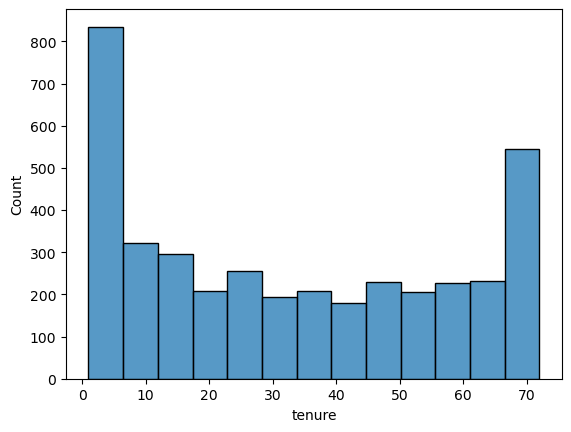

1     351
72    213
2     141
3     112
4     104
     ... 
43     30
51     29
39     29
59     28
36     24
Name: tenure, Length: 72, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


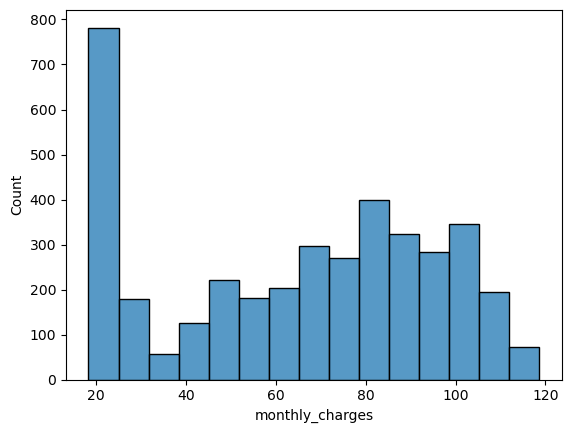

20.05     40
19.95     30
19.65     30
19.90     29
19.85     27
          ..
71.85      1
91.75      1
110.15     1
38.50      1
92.55      1
Name: monthly_charges, Length: 1331, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


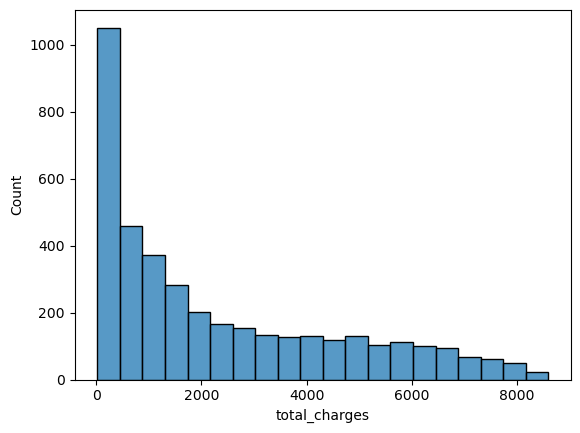

20.20      10
19.90       7
20.05       6
19.75       6
45.30       6
           ..
25.30       1
6065.30     1
1623.40     1
4385.05     1
42.70       1
Name: total_charges, Length: 3748, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


In [12]:
# Testing continuous distributions
for col in quant_vars:
    print(train[f'{col}'].value_counts(), sns.histplot(data = train[f'{col}']), plt.show(),
          end = '\n------------------------------------\n')

##### Distribution takeaways:
- None of the variables are disrtibuted normally
- All statistical tests will be non-parametric

## Hypothesis Testing
### Baseline Questions:
- Do fiber customers have lower monthly tenure than other customers?
- Is there a relationship between fiber internet service and e-check payment method?
    - Paperless billing?
- Do month-to-month customers have higher monthly charges than other customers?

In [13]:
# Setting alpha
alpha = .05

### Question 1: Do fiber customers have lower monthly tenure than average customers?
- $H_{0}$: Fiber customers have the same or higher monthly tenure compared to all customers.
- $H_{a}$: Fiber customers have the lower monthly tenure compared to all customers.

In [61]:
fiber = train[train.internet_fiber == 1].tenure
μ = train.tenure.mean()

t, p = stats.wilcoxon(fiber - μ)
t, p/2

(700514.0, 0.022835540230033525)

In [62]:
if p/2 < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject null hypothesis


### Question 1: Is there a  fiber customers have lower monthly tenure than other mtm customers?
- $H_{0}$: Fiber customers have the same or higher monthly tenure compared to all customers.
- $H_{a}$: Fiber customers have the lower monthly tenure compared to all customers.

In [63]:
month_fiber = train[train.mtm_fiber == 1].tenure
int_fib = train[train['contract_m_to_m'] == 1].tenure

t, p = stats.ttest_ind(month_fiber, int_fib)
t, p

(5.890528965499957, 4.2329056773439295e-09)

In [57]:
mtm.mean(), month_fiber.mean()

(18.123325635103924, 22.061749571183533)

### Question 2: Is there a relationship between fiber internet service and e-check payment method?
- $H_{0}$: There is no relationship between fiber internet service and e-check.
- $H_{a}$: There is a relationship between fiber internet service and e-check.

In [16]:
observed = pd.crosstab(train.internet_fiber, train.payment_e_check)
observed

payment_e_check,0,1
internet_fiber,,
0,1788,427
1,860,862


In [17]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
expected, p, chi2

(array([[1489.79425959,  725.20574041],
        [1158.20574041,  563.79425959]]),
 2.4166196422613814e-92,
 415.42524656645816)

In [18]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject null hypothesis


##### Is there a relationship between fiber internet service and paperless billing?
- $H_{0}$: There is no relationship between fiber internet service and paperless billing.
- $H_{a}$: There is a relationship between fiber internet service and paperless billing.

In [19]:
observed = pd.crosstab(train.internet_fiber, train.has_pprless_bill)
observed

has_pprless_bill,0,1
internet_fiber,,
0,1227,988
1,386,1336


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
expected, p, chi2

(array([[ 907.49174498, 1307.50825502],
        [ 705.50825502, 1016.49174498]]),
 1.8528726594316296e-96,
 434.3328908781917)

In [21]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject null hypothesis


### Question 3: Do month-to-month customers have higher monthly charges than other customers?
- $H_{0}$: Month-to-month customers have equal or lower monthly charges than other customers.
- $H_{a}$: Month-to-month customers have higher monthly charges than other customers.

In [22]:
m2m = train[train.contract_m_to_m == 1].monthly_charges
μ = train.monthly_charges.mean()

t, p = stats.wilcoxon(m2m - μ)
t, p/2

(1099964.0, 0.006418755825656142)

In [23]:
if p/2 < alpha:
    if t > 0:
        print("Reject Null Hypothesis")
    elif t < 0:
        print("Fail to reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

Reject Null Hypothesis


### Hypothesis Testing Takeaways:
- All of the questions had their $H_{0}$ rejected meaning:
    1. Fiber customers have the lower monthly tenure compared to all customers.
    2. There is a relationship between fiber internet service and e-check.
        -  There is a relationship between fiber internet service and paperless billing.
    3. Month-to-month customers have higher monthly charges than other customers.

# Modeling
- Establish a baseline model to compare other models to
- Create a combination of features to feed models
- Train three different classification models
    1. kNN
    2. Decision Tree
    3. Random Forrest
- Compare each models accuracy to baseline accuracy
- Compare model accuracy for in-set to out-of-set accuracy

In [24]:
# Creating a list of tuples containing possible combinations of categorical features

# import itertools

# features = [col for col in train.columns if train[f'{col}'].nunique() <= 2] #Filters out any continuos vars
            
# possible_combinations = []
            
# for i in range(2, len(features) + 1):
#     possible_combinations.extend(list(itertools.combinations(features, i)))

# possible_combinations[0:5]

In [25]:
# Establish baseline model, we know that only 26% have churned so we will set the baseline
# to predict for not churned

unclean_telco['baseline'] = 'No'
unclean_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,baseline
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.9,542.4,No,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,No
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,No
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,No


In [26]:
baseline = (unclean_telco.churn == unclean_telco.baseline).mean()
f'Baseline accuracy: {(unclean_telco.churn == unclean_telco.baseline).mean():.2%}'

'Baseline accuracy: 73.46%'

In [27]:
# Setting X and y for each dataset
X_train, y_train = train.drop(columns='has_churned'), train.has_churned
X_validate, y_validate = validate.drop(columns='has_churned'), validate.has_churned
X_test, y_test = test.drop(columns='has_churned'), test.has_churned

### Decision Tree

In [28]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf = clf.fit(X_train, y_train)

In [29]:
# dot_data = export_graphviz(clf, feature_names= X_train.columns,class_names=['died','lived'], rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('titanic_decision_tree', view=True)

In [30]:
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.9587156 , 0.0412844 ],
       [0.9587156 , 0.0412844 ],
       [0.86150235, 0.13849765],
       [0.66981132, 0.33018868],
       [0.9587156 , 0.0412844 ]])

#### Evaluate:

In [31]:
tscore = clf.score(X_train, y_train)
vscore = clf.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(clf)
print(pd.DataFrame(report))
print(f"Tree with max depth of 5")
print(f'Accuracy of decision tree classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

dt_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on train data')
    
print(f'The difference in preformance on train data and validate data is {dt_diff:.2%}')

DecisionTreeClassifier(max_depth=5, random_state=123)
                     0            1  accuracy    macro avg  weighted avg
precision     0.853499     0.680319  0.814834     0.766909      0.807488
recall        0.902802     0.571702  0.814834     0.737252      0.814834
f1-score      0.877458     0.621299  0.814834     0.749379      0.809401
support    2891.000000  1046.000000  0.814834  3937.000000   3937.000000
Tree with max depth of 5
Accuracy of decision tree classifier on train set: 81.48%
Accuracy of random forest classifier on train set: 77.61%

The model preformed 8.02% better than baseline on train data
The model preformed 4.14% better than baseline on train data
The difference in preformance on train data and validate data is 3.88%


In [32]:
confusion = confusion_matrix(y_train, y_pred)
con_df = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2610,281
churned,448,598


In [33]:
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 81.48%
True Positive Rate: 85.35%
False Positive Rate: 31.97%
True Negaitve Rate: 68.03%
False Negative Rate: 14.65%


### Random Forrest

In [34]:
rfc = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)

In [35]:
for i in range(0, len(list(X_train.columns))):
    print(X_train.columns[i], rfc.feature_importances_[i])

is_male 0.015398521963306567
is_senior 0.016108762150423252
has_partner 0.01261609836345852
has_dependents 0.010150036539768401
tenure 0.15009195597228753
has_phone 0.0058585039286326605
has_multi_line 0.00963189398205624
has_onl_sec 0.02219069086156997
has_backup 0.013109976109827717
has_dev_pro 0.011958999279974581
has_tech_supp 0.017778342180232262
has_tv_strm 0.01196221917546607
has_mv_strm 0.012706977277735397
has_pprless_bill 0.01828921405619354
monthly_charges 0.10560860324329527
total_charges 0.13687145202715378
payment_bank 0.007231137794373758
payment_card 0.007849504814650264
payment_e_check 0.03582356497825255
payment_m_check 0.007682544382410916
internet_dsl 0.011413742169806854
internet_fiber 0.05166950937683064
internet_none 0.019838201615712373
contract_m_to_m 0.10126544552940975
contract_one_year 0.009792438667214638
contract_two_year 0.027457315919213243
auto_bill 0.014044483558272008
fbr_multi_line 0.01220193549113006
full_protection 0.0018954367530999256
mtm_fiber 0

In [36]:
y_pred = rfc.predict(X_train)
y_pred_proba = rfc.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.91690305, 0.08309695],
       [0.92023022, 0.07976978],
       [0.95419805, 0.04580195],
       [0.67938175, 0.32061825],
       [0.94146675, 0.05853325]])

#### Evaluate:

In [37]:
tscore = rfc.score(X_train, y_train)
vscore = rfc.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(rfc)
print(pd.DataFrame(report))
print(f"Forrest with max depth of 10 and minimum leaf samples 2")
print(f'Accuracy of random forest classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

rf_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on train data')
    
print(f'The difference in preformance on train data and validate data is {rf_diff:.2%}')

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)
                     0            1  accuracy    macro avg  weighted avg
precision     0.896586     0.820426   0.87935     0.858506      0.876351
recall        0.944656     0.698853   0.87935     0.821754      0.879350
f1-score      0.919993     0.754775   0.87935     0.837384      0.876097
support    2891.000000  1046.000000   0.87935  3937.000000   3937.000000
Forrest with max depth of 10 and minimum leaf samples 2
Accuracy of random forest classifier on train set: 87.93%
Accuracy of random forest classifier on train set: 78.02%

The model preformed 14.47% better than baseline on train data
The model preformed 4.56% better than baseline on train data
The difference in preformance on train data and validate data is 9.91%


In [38]:
confusion1 = confusion_matrix(y_train, y_pred)
con_df1 = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df1.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2731,160
churned,315,731


In [39]:
TP = confusion1[0,0]
TN = confusion1[1,1]
FP = confusion1[0,1]
FN = confusion1[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 87.93%
True Positive Rate: 89.66%
False Positive Rate: 17.96%
True Negaitve Rate: 82.04%
False Negative Rate: 10.34%


### kNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:5]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2]])

#### Evaluate:

In [42]:
tscore = knn.score(X_train, y_train)
vscore = knn.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(knn)
print(pd.DataFrame(report))
print(f"K Nearest Neighbor with n_neighbors set to 5")
print(f'Accuracy of K Nearest Neighbor classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

knn_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on train data')
    
print(f'The difference in preformance on train data and validate data is {knn_diff:.2%}')

KNeighborsClassifier()
                     0            1  accuracy    macro avg  weighted avg
precision     0.859214     0.731092  0.832106     0.795153      0.825174
recall        0.922518     0.582218  0.832106     0.752368      0.832106
f1-score      0.889741     0.648217  0.832106     0.768979      0.825572
support    2891.000000  1046.000000  0.832106  3937.000000   3937.000000
K Nearest Neighbor with n_neighbors set to 5
Accuracy of K Nearest Neighbor classifier on train set: 83.21%
Accuracy of random forest classifier on train set: 75.89%

The model preformed 9.75% better than baseline on train data
The model preformed 2.43% better than baseline on train data
The difference in preformance on train data and validate data is 7.32%


In [43]:
confusion2 = confusion_matrix(y_train, y_pred)
con_df2 = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df2.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2667,224
churned,437,609


In [44]:
TP = confusion2[0,0]
TN = confusion2[1,1]
FP = confusion2[0,1]
FN = confusion2[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 83.21%
True Positive Rate: 85.92%
False Positive Rate: 26.89%
True Negaitve Rate: 73.11%
False Negative Rate: 14.08%


In [45]:
if (dt_diff < rf_diff) & (dt_diff < knn_diff):
    print(f'The best preforming model is the Decision Tree classifier with a difference in preformance of {dt_diff:.2%}')
elif (rf_diff < dt_diff) & (rf_diff < knn_diff):
    print(f'The best preforming model is the Random Forrest classifier with a difference in preformance of {rf_diff:.2%}')
elif (knn_diff < rf_diff) & (knn_diff < dt_diff):
    print(f'The best preforming model is the K Nearest Neighbor classifier with a difference in preformance of {knn_diff:.2%}')

The best preforming model is the Decision Tree classifier with a difference in preformance of 3.88%


## Testing on Test

In [46]:
print('Accuracy of Decision Tree classifier on test set: {:.2%}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 78.96%
